# Proyek Analisis Data: Nama dataset
- Nama: Jane Tamara Setiadi
- Email: littleowl008@yahoo.com
- Id Dicoding: Jane Tamara

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penjualan dan revenue perusahaan dalam beberapa bulan terakhir?
- Produk apa yang paling banyak dan paling sedikit terjual?
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

## Menyiapkan semua library yang dibutuhkan

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"janetas","key":"65b90c92b410b57ca9ddca7c2b00a07a"}'}

In [164]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

!chmod 600 ~/.kaggle/kaggle.json

In [165]:
!kaggle datasets download -d olistbr/brazilian-ecommerce

brazilian-ecommerce.zip: Skipping, found more recently modified local copy (use --force to force download)


## Data Wrangling

Data wrangling merupakan sebuah proses atau kumpulan kegiatan yang meliputi pengumpulan data (Gathering data), penilaian data (Assessing data), serta pembersihan data (Cleaning data) sebelum data digunakan dalam proses analisis data.

### Gathering Data

Sumber data : E-Commerce Public Dataset

https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data

In [170]:
import zipfile
import os

zip_path = "brazilian-ecommerce.zip"
extract_path = "extracted_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
  zip_ref.extractall(extract_path)

extracted_files = os.listdir(extract_path)
print(extracted_files)

['olist_customers_dataset.csv', 'olist_order_reviews_dataset.csv', 'olist_geolocation_dataset.csv', 'olist_sellers_dataset.csv', 'product_category_name_translation.csv', 'olist_order_payments_dataset.csv', 'olist_products_dataset.csv', 'olist_order_items_dataset.csv', 'olist_orders_dataset.csv']


In [172]:
dfs = {}
for file_name in extracted_files:
  if file_name.endswith('.csv'):
    file_path = os.path.join(extract_path, file_name)
    print(file_path)

extracted_data/olist_customers_dataset.csv
extracted_data/olist_order_reviews_dataset.csv
extracted_data/olist_geolocation_dataset.csv
extracted_data/olist_sellers_dataset.csv
extracted_data/product_category_name_translation.csv
extracted_data/olist_order_payments_dataset.csv
extracted_data/olist_products_dataset.csv
extracted_data/olist_order_items_dataset.csv
extracted_data/olist_orders_dataset.csv


In [173]:
# Membuat dataframe berdasarkan masing-masing dataset :

cust = pd.read_csv('extracted_data/olist_customers_dataset.csv')
items = pd.read_csv('extracted_data/olist_order_items_dataset.csv')
geo = pd.read_csv('extracted_data/olist_geolocation_dataset.csv')
payments = pd.read_csv('extracted_data/olist_order_payments_dataset.csv')
reviews = pd.read_csv('extracted_data/olist_order_reviews_dataset.csv')
orders = pd.read_csv('extracted_data/olist_orders_dataset.csv')
products = pd.read_csv('extracted_data/olist_products_dataset.csv')
sellers = pd.read_csv('extracted_data/olist_sellers_dataset.csv')
category = pd.read_csv('extracted_data/product_category_name_translation.csv')

Data Schema

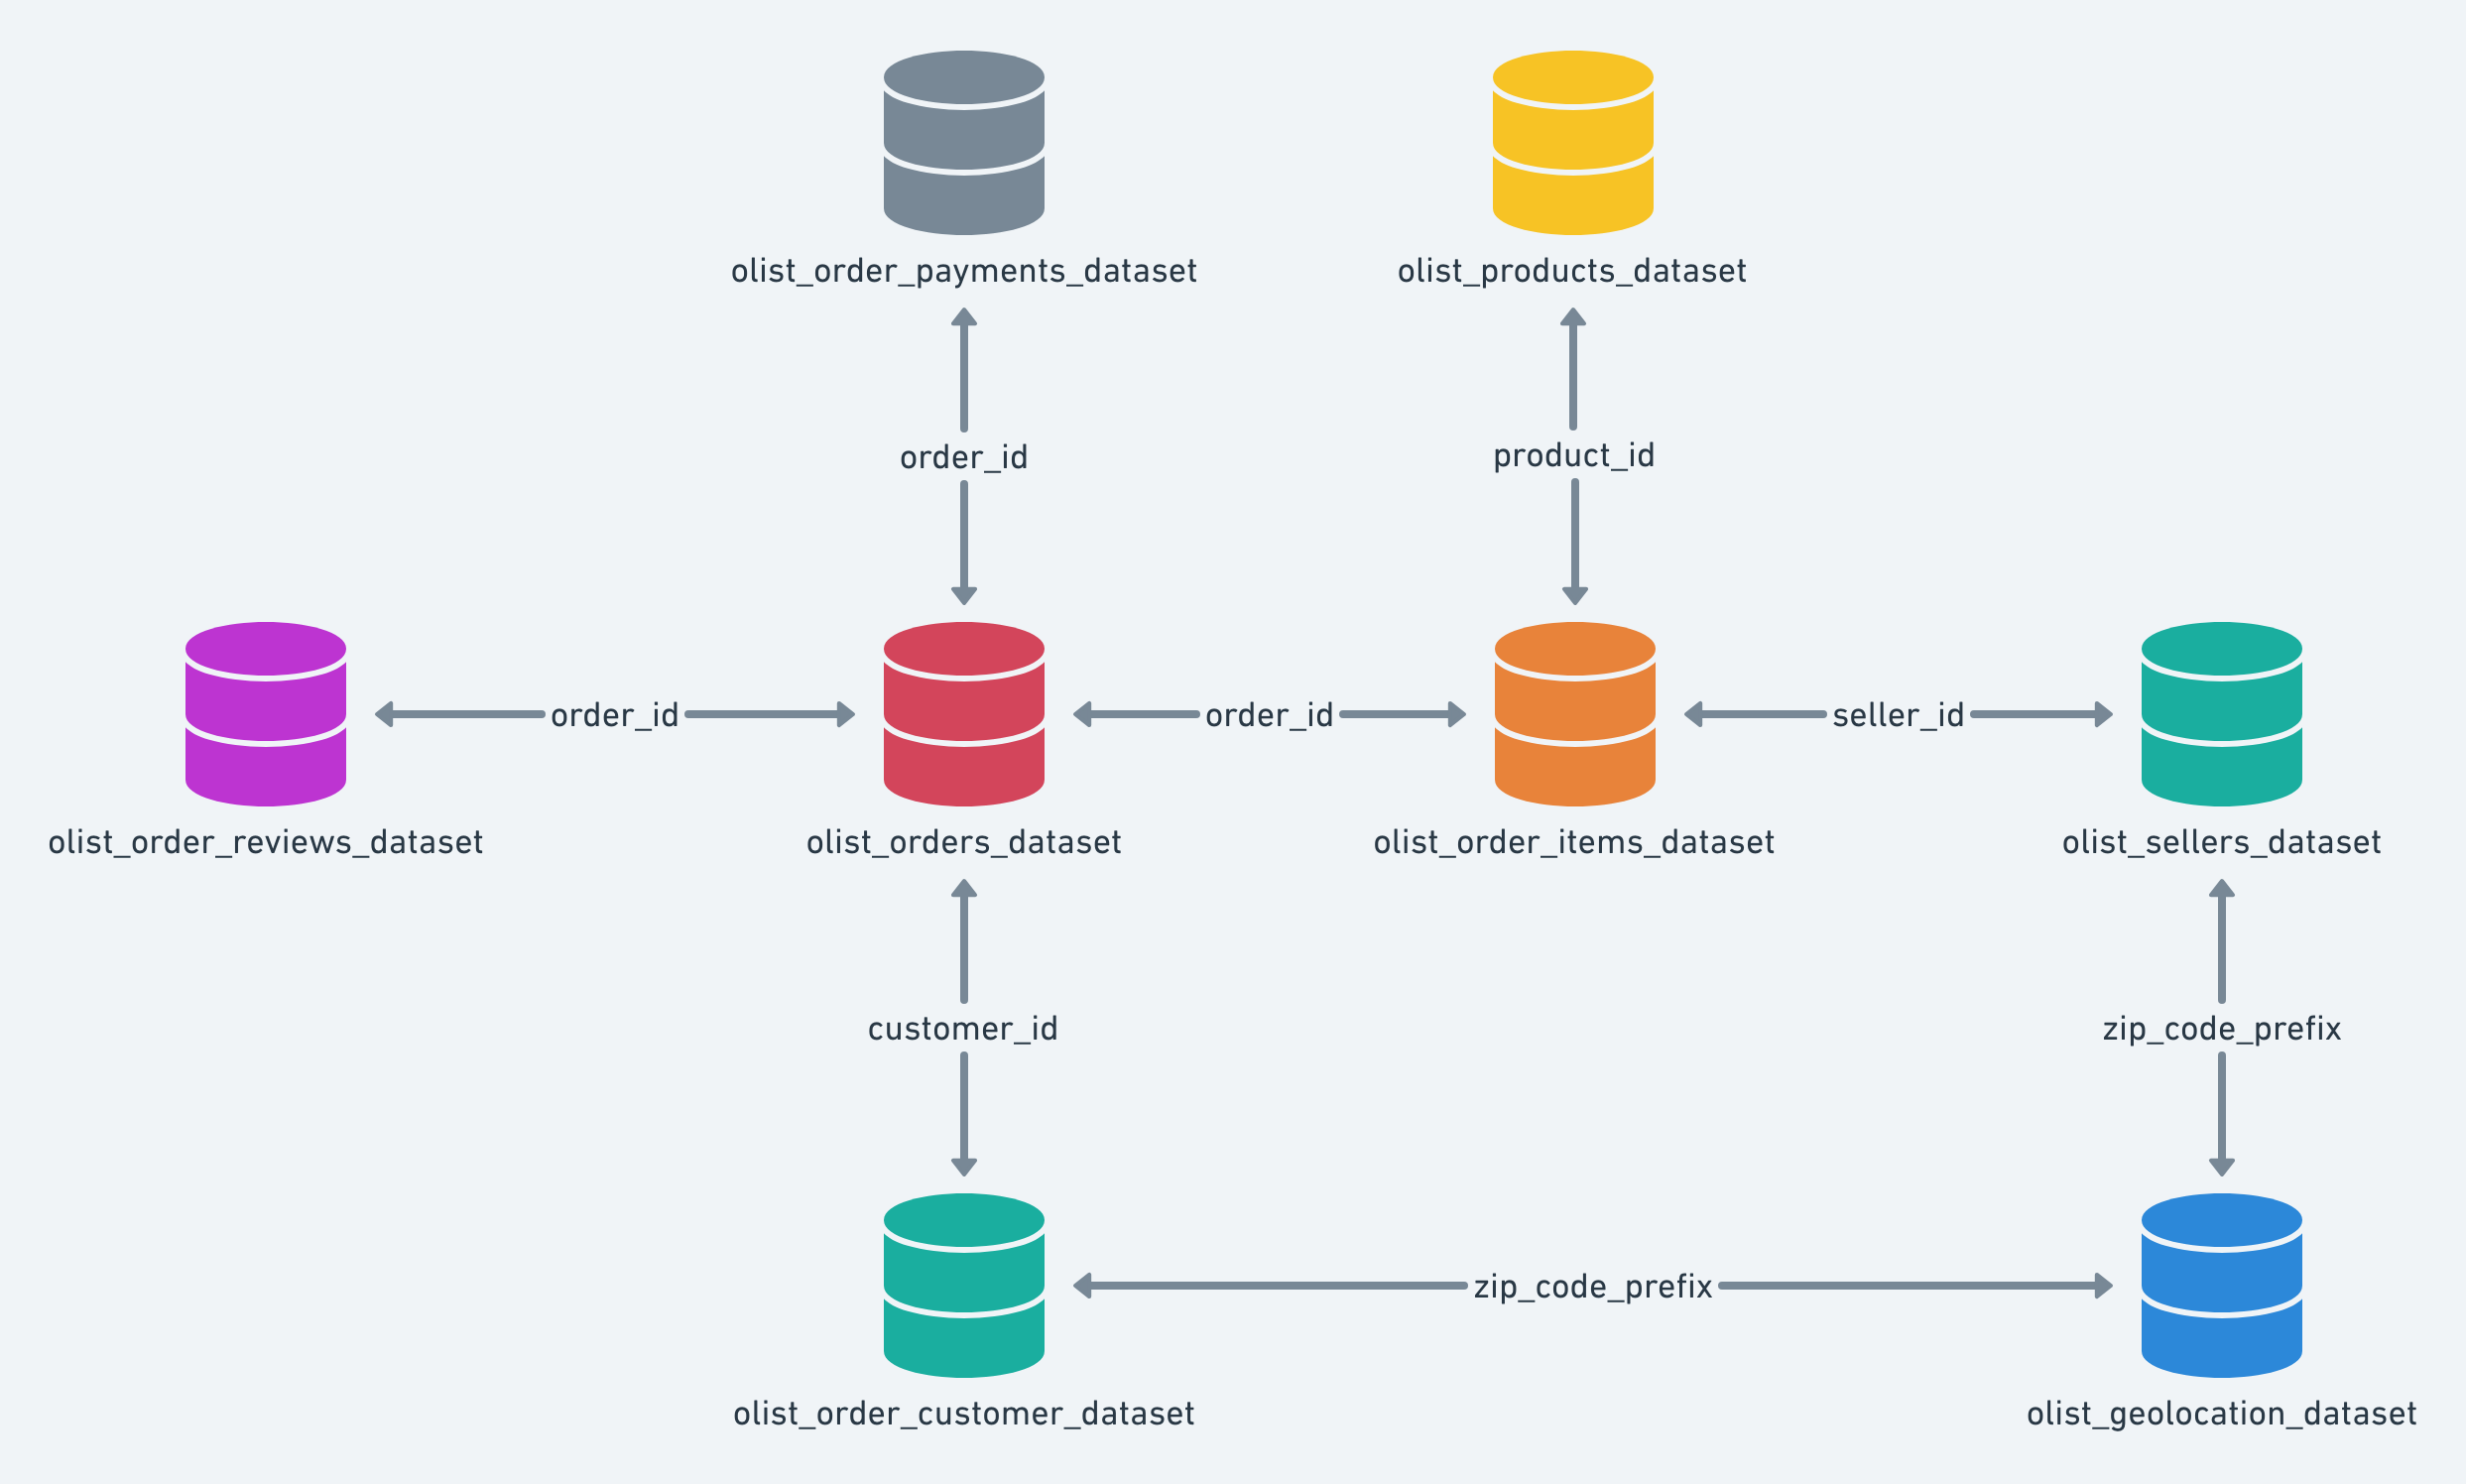

### Assessing Data

Memeriksa setiap data yang tersedia untuk menilai apakah ada null, duplikasi atau error dalam data

In [174]:
# customers :

cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
cust.duplicated().sum()

0

In [ ]:
# geolocation :
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
geo.duplicated().sum()

261831

In [ ]:
# order_items :
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
items.duplicated().sum()

0

In [ ]:
# order_payments :
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
payments.duplicated().sum()

0

In [ ]:
# order_reviews :
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [ ]:
reviews.duplicated().sum()

0

In [ ]:
# orders :
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
orders.duplicated().sum()

0

In [ ]:
# products :
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
products.duplicated().sum()

0

In [ ]:
# sellers :
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
sellers.duplicated().sum()

0

In [ ]:
# product_category_name :
category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [ ]:
category.duplicated().sum()

0

Lakukan penggabungan data untuk menghasilkan main dataframe

In [175]:
# menghapus duplikasi data geological :
geo.drop_duplicates()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000155,99965,-28.180655,-52.034367,agua santa,RS
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS


In [176]:
# melakukan perhitungan mean untuk geolocation data :
mean_lat = geo.groupby('geolocation_zip_code_prefix')['geolocation_lat'].mean().reset_index()
mean_lng = geo.groupby('geolocation_zip_code_prefix')['geolocation_lng'].mean().reset_index()

mean_lat.rename(columns={'geolocation_lat': 'mean_lat'}, inplace=True)
mean_lng.rename(columns={'geolocation_lng': 'mean_lng'}, inplace=True)

geo_final = pd.merge(mean_lat, mean_lng, on='geolocation_zip_code_prefix')

In [177]:
# penggabungan data :

items_products = pd.merge(items,products,on='product_id',how='outer')
items_products_sellers = pd.merge(items_products,sellers, on='seller_id',how='outer')
items_products_sellers_orders = pd.merge(items_products_sellers,orders,on='order_id',how='outer')
items_products_sellers_orders_cust = pd.merge(items_products_sellers_orders,cust,on='customer_id',how='outer')
items_products_sellers_orders_cust_reviews = pd.merge(items_products_sellers_orders_cust,reviews,on='order_id',how='outer')
items_products_sellers_orders_cust_reviews_payments = pd.merge(items_products_sellers_orders_cust_reviews,payments,on='order_id',how='outer')
items_products_sellers_orders_cust_reviews_payments_category = items_products_sellers_orders_cust_reviews_payments.merge(category, on='product_category_name', how='left')

items_products_sellers_orders_cust_reviews_payments_category['product_category_name'] = items_products_sellers_orders_cust_reviews_payments_category['product_category_name_english']
items_products_sellers_orders_cust_reviews_payments_category.drop(['product_category_name'], axis=1, inplace=True)

items_products_sellers_orders_cust_reviews_payments_category_sellergeo = pd.merge(items_products_sellers_orders_cust_reviews_payments_category, geo_final, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')
items_products_sellers_orders_cust_reviews_payments_category_sellergeo.rename(columns={
    'mean_lat' : 'seller_lat',
    'mean_lng' : 'seller_lng'
}, inplace=True)

items_products_sellers_orders_cust_reviews_payments_category_sellergeo.drop(['geolocation_zip_code_prefix'], axis=1, inplace=True)

# main dataframe :
df=items_products_sellers_orders_cust_reviews_payments_category_sellergeo

### Cleaning Data

In [178]:
# memeriksa duplikasi data
df.duplicated().sum()

0

In [179]:
# memeriksa data numerik
df.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,customer_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value,seller_lat,seller_lng
count,118045.000000,118045.000000,118045.000000,116337.000000,116337.000000,116337.000000,118025.000000,118025.000000,118025.000000,118025.000000,118045.000000,118045.000000,117068.000000,118042.000000,118042.000000,118042.000000,118045.000000,118045.000000
mean,1.196586,120.690802,20.031213,48.755134,785.959385,2.200211,2109.851082,30.254311,16.636196,23.062334,24439.054818,35049.431005,4.031324,1.094212,2.942165,172.630455,-22.795042,-47.238176
std,0.699906,184.270650,15.847340,10.035981,653.054900,1.712940,3780.432569,16.182465,13.461746,11.724349,27571.063162,29825.239991,1.388084,0.729345,2.777012,267.355089,2.690838,2.339804
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,1003.000000,1.000000,1.000000,0.000000,0.000000,-32.079231,-67.813284
25%,1.000000,39.900000,13.080000,42.000000,345.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6440.000000,11310.000000,4.000000,1.000000,1.000000,60.780000,-23.606344,-48.829744
50%,1.000000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,24241.000000,5.000000,1.000000,2.000000,108.140000,-23.425556,-46.750602
75%,1.000000,134.900000,21.180000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27525.000000,58640.000000,5.000000,1.000000,4.000000,189.320000,-21.757321,-46.518679
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,99990.000000,5.000000,29.000000,24.000000,13664.080000,-2.501242,-34.855616


In [180]:
# memeriksa isnull
df.isnull().sum()

order_id                              0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_name_lenght                1708
product_description_lenght         1708
product_photos_qty                 1708
product_weight_g                     20
product_length_cm                    20
product_height_cm                    20
product_width_cm                     20
seller_zip_code_prefix                0
seller_city                           0
seller_state                          0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1250
order_delivered_customer_date      2584
order_estimated_delivery_date         0
customer_unique_id                    0


<Axes: >

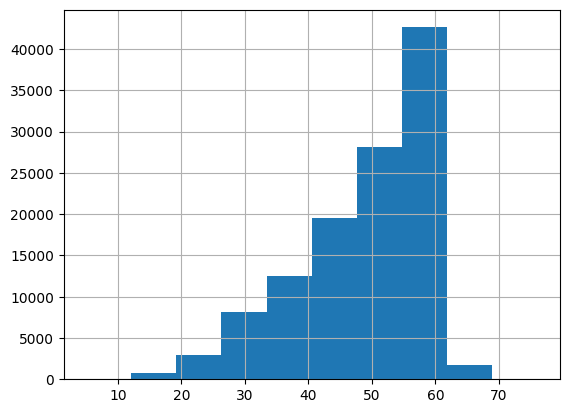

In [ ]:
df['product_name_lenght'].hist()

In [ ]:
print('nilai modus = ', df['product_name_lenght'].mode()[0])
print('nilai median = ', df['product_name_lenght'].median())

nilai modus =  59.0
nilai median =  52.0


In [181]:
# Mengisi missing values di 'product_name_lenght' dengan nilai modus :

df['product_name_lenght'].fillna(df['product_name_lenght'].mode()[0], inplace=True)

<Axes: >

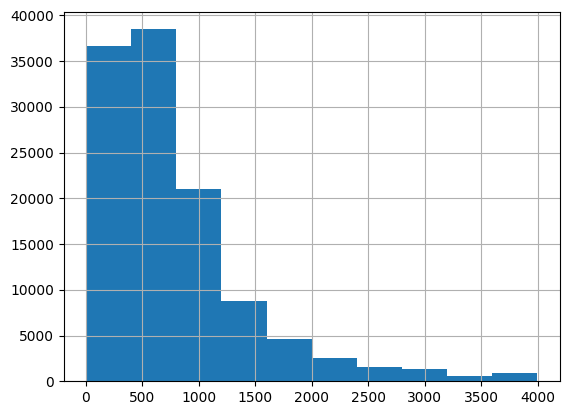

In [ ]:
df['product_description_lenght'].hist()

In [ ]:
print('nilai modus = ', df['product_description_lenght'].mode()[0])
print('nilai median = ', df['product_description_lenght'].median())

nilai modus =  341.0
nilai median =  600.0


In [182]:
# Mengisi nilai values di 'product_description_length' dengan nilai median :

df['product_description_lenght'].fillna(df['product_description_lenght'].median(), inplace=True)

<Axes: >

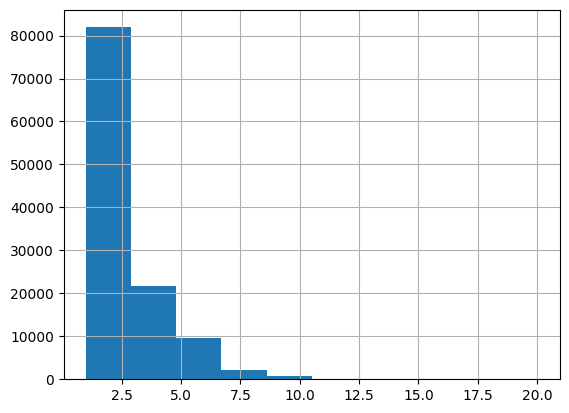

In [ ]:
df['product_photos_qty'].hist()

In [ ]:
print('nilai modus = ', df['product_photos_qty'].mode()[0])
print('nilai median = ', df['product_photos_qty'].median())

nilai modus =  1.0
nilai median =  1.0


In [183]:
# Mengisi nilai values di 'product_photos_qty' dengan nilai modus

df['product_photos_qty'].fillna(df['product_photos_qty'].mode()[0], inplace=True)

<Axes: >

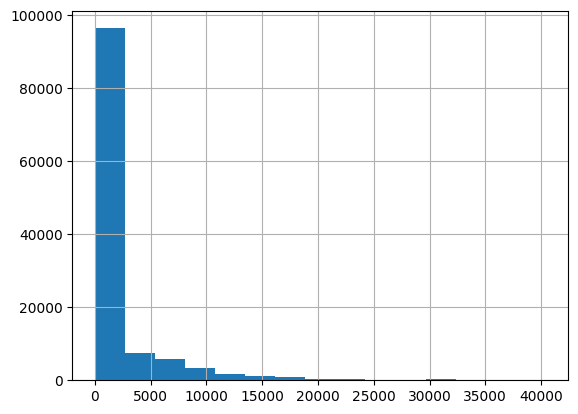

In [ ]:
df['product_weight_g'].hist(bins = 15)

In [ ]:
print('nilai modus = ', df['product_weight_g'].mode()[0])
print('nilai median = ', df['product_weight_g'].median())

nilai modus =  200.0
nilai median =  700.0


In [184]:
# Mengisi nilai values di 'product_weight_g' dengan nilai modus

df['product_weight_g'].fillna(df['product_weight_g'].mode()[0], inplace=True)

<Axes: >

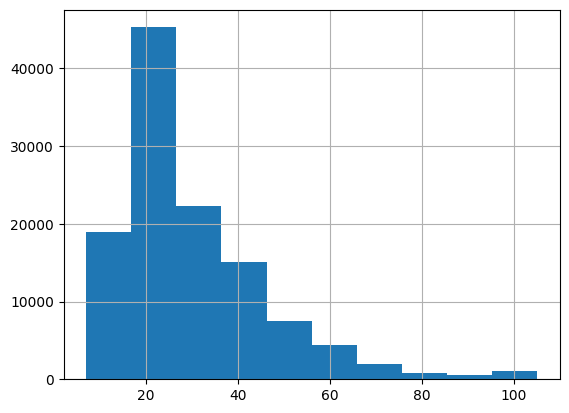

In [ ]:
df['product_length_cm'].hist()

In [ ]:
print('nilai modus = ', df['product_length_cm'].mode()[0])
print('nilai median = ', df['product_length_cm'].median())

nilai modus =  16.0
nilai median =  25.0


In [185]:
# Mengisi nilai values di 'product_length_cm' dengan nilai modus

df['product_length_cm'].fillna(df['product_length_cm'].mode()[0], inplace=True)

<Axes: >

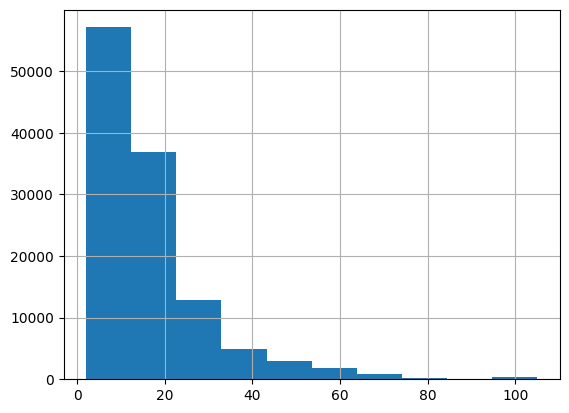

In [ ]:
df['product_height_cm'].hist()

In [ ]:
print('nilai modus = ', df['product_height_cm'].mode()[0])
print('nilai median = ', df['product_height_cm'].median())

nilai modus =  10.0
nilai median =  13.0


In [186]:
# Mengisi nilai values di 'product_height_cm' dengan nilai modus

df['product_height_cm'].fillna(df['product_height_cm'].mode()[0], inplace=True)

<Axes: >

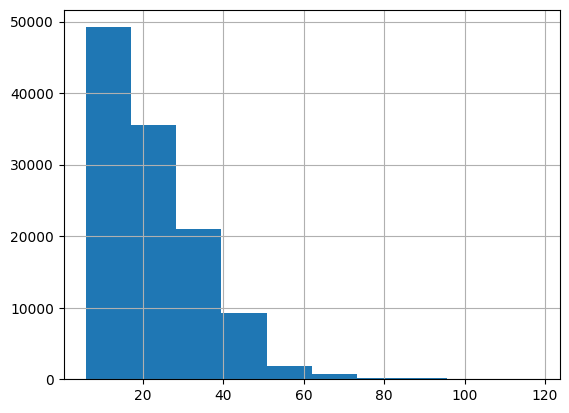

In [ ]:
df['product_width_cm'].hist()

In [ ]:
print('nilai modus = ', df['product_width_cm'].mode()[0])
print('nilai median = ', df['product_width_cm'].median())

nilai modus =  20.0
nilai median =  20.0


In [187]:
# Mengisi nilai values di 'product_width_cm' dengan nilai modus

df['product_width_cm'].fillna(df['product_width_cm'].mode()[0], inplace=True)

In [188]:
# Mengisi nilai value di 'product_category_name_english' dengan nilai yang ada

df['product_category_name_english'].fillna(df['product_category_name_english'].mode()[0], inplace=True)

In [189]:
# Mengisi nilai values di 'review_comment_message' with 'no comment'
df['review_comment_message'].fillna(value='no comment', inplace=True)

# Mengisi nilai values di 'review_comment_title' with 'no comment'
df['review_comment_title'].fillna(value='no comment', inplace=True)

In [190]:
# Convert kolom ke tipe datetime
columns_to_convert = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date']

df[columns_to_convert] = df[columns_to_convert].apply(pd.to_datetime)

In [191]:
# Memeriksa data isnull :

df.isnull().sum()

order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1250
order_delivered_customer_date    2584
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_cit

In [192]:
# menghapus semua nilai tanggal null

df.dropna(inplace = True)

In [193]:
df.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
review_id           

In [194]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,...,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,product_category_name_english,seller_lat,seller_lng
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,58.0,598.0,4.0,...,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,1.0,credit_card,2.0,72.19,cool_stuff,-22.496953,-44.127492
1,130898c0987d1801452a8ed92a670612,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,58.0,598.0,4.0,...,"lannister como sempre, entregou certinho e den...",2017-07-14 00:00:00,2017-07-17 12:50:07,1.0,boleto,1.0,73.86,cool_stuff,-22.496953,-44.127492
2,532ed5e14e24ae1f0d735b91524b98b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,58.0,598.0,4.0,...,carrinho muito bonito,2018-06-05 00:00:00,2018-06-06 21:41:12,1.0,credit_card,2.0,83.23,cool_stuff,-22.496953,-44.127492
3,6f8c31653edb8c83e1a739408b5ff750,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,58.0,598.0,4.0,...,no comment,2017-08-10 00:00:00,2017-08-13 03:35:17,1.0,credit_card,3.0,75.07,cool_stuff,-22.496953,-44.127492
4,7d19f4ef4d04461989632411b7e588b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,58.0,598.0,4.0,...,no comment,2017-08-25 00:00:00,2017-08-28 00:51:18,1.0,credit_card,4.0,72.19,cool_stuff,-22.496953,-44.127492


## Exploratory Data Analysis (EDA)

### Explore Data Payment

In [195]:
# Menambahkan kolom 'installment' untuk mendata payment_installment=True dimana payment bernilai > 1

df["installment"] = df['payment_installments'].apply(lambda x: False if x < 2 else True)

relative_frequency = df['installment'].value_counts() / len(df['installment'])
relative_frequency

True     0.501279
False    0.498721
Name: installment, dtype: float64

Menunjukkan bahwa 50% payment dilakukan secara installment.

### Explore Data Seller

In [196]:
# Menghitung rating seller dan jumlah produk terjual dengan groupby & aggregasi
seller_group = df.groupby('seller_id')[['review_score', 'order_id']].agg({'review_score': 'mean', 'order_id': 'count'})
seller_group.rename(columns={'review_score': 'seller_rating', 'order_id': 'product_sold_by_seller'}, inplace=True)
seller_group

,seller_rating,product_sold_by_seller
seller_id,,
0015a82c2db000af6aaaf3ae2ecb0532,3.666667,3
001cca7ae9ae17fb1caed9dfb1094831,3.974249,233
002100f778ceb8431b7a1020ff7ab48f,4.086207,58
003554e2dce176b5555353e4f3555ac8,5.000000,1
004c9cd9d87a3c30c522c48c4fc07416,4.128079,203
...,...,...
ffc470761de7d0232558ba5e786e57b7,4.281250,32
ffdd9f82b9a447f6f8d4b91554cc7dd3,4.285714,21
ffeee66ac5d5a62fe688b9d26f83f534,4.214286,14


### Explore Data Product

In [197]:
# Menghitung rating product menggunakan groupby dan aggregasi
product_group = df.groupby('product_id')['review_score'].mean().reset_index()
product_group.rename(columns={'review_score': 'product_rating'}, inplace=True)
product_group

,product_id,product_rating
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,00088930e925c41fd95ebfe695fd2655,4.0
2,0009406fd7479715e4bef61dd91f2462,1.0
3,000b8f95fcb9e0096488278317764d19,5.0
4,000d9be29b5207b54e86aa1b1ac54872,5.0
...,...,...
31999,fff6177642830a9a94a0f2cba5e476d1,4.5
32000,fff81cc3158d2725c0655ab9ba0f712c,4.0
32001,fff9553ac224cec9d15d49f5a263411f,5.0
32002,fffdb2d0ec8d6a61f0a0a0db3f25b441,5.0


In [198]:
# Merge the calculated values back into the original DataFrame
df = df.merge(seller_group, on='seller_id', how='left')
df = df.merge(product_group, on='product_id', how='left')

In [199]:
# Menghitung average price dan rating dari masing-masing 'product_category'
category_avg = df.groupby('product_category_name_english').agg({'price': 'mean', 'review_score': 'mean'}).reset_index()
category_avg.rename(columns={'price': 'avg_product_category_price', 'review_score': 'avg_product_category_rating'}, inplace=True)

# Merge the calculated averages back into the original DataFrame
df = df.merge(category_avg, on='product_category_name_english', how='left')

category_avg

,product_category_name_english,avg_product_category_price,avg_product_category_rating
0,agro_industry_and_commerce,332.835691,4.227642
1,air_conditioning,185.349758,4.051903
2,art,117.130390,4.073171
3,arts_and_craftmanship,75.583750,4.125000
4,audio,138.940480,3.845333
...,...,...,...
66,stationery,90.304825,4.234602
67,tablets_printing_image,80.239176,4.117647
68,telephony,70.255411,3.993645
69,toys,115.859845,4.210971


In [200]:
# Melihat category produk yang paling banyak terjual
df.groupby('product_category_name_english').order_id.nunique().sort_values(ascending=False)

product_category_name_english
bed_bath_table               10569
health_beauty                 8602
sports_leisure                7484
computers_accessories         6498
furniture_decor               6255
                             ...  
arts_and_craftmanship           23
la_cuisine                      12
cds_dvds_musicals               12
fashion_childrens_clothes        7
security_and_services            2
Name: order_id, Length: 71, dtype: int64

### Explore Data Customer

In [201]:
# Menghitung total price dan average review score dari pembelian by state
cust_state_group = df.groupby('customer_state').agg({'payment_value':'sum', 'order_id':'count', 'review_score':'mean'}).reset_index()
cust_state_group

,customer_state,payment_value,order_id,review_score
0,AC,24665.07,93,4.118280
1,AL,107164.83,442,3.814480
2,AM,34490.67,169,4.100592
3,AP,21451.33,82,4.280488
4,BA,768442.41,3905,3.861972
5,CE,332018.91,1492,3.882708
6,DF,420090.65,2423,4.052002
7,ES,383977.20,2278,4.005268
8,GO,448821.68,2355,4.028875
9,MA,194319.63,815,3.739877


In [202]:
# Menghitung persebaran jumlah pelanggan berdasarkan city dan state dengan groupby
df.groupby(by='customer_city').customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo                  14914
rio de janeiro              6511
belo horizonte              2674
brasilia                    2057
curitiba                    1477
                           ...  
salinas da margarida           1
centralina                     1
centro novo do maranhao        1
cerejeiras                     1
cambiasca                      1
Name: customer_id, Length: 4078, dtype: int64

In [203]:
df.groupby(by='customer_state').customer_id.nunique().sort_values(ascending=False)

customer_state
SP    40186
RJ    12175
MG    11255
RS     5311
PR     4888
SC     3511
BA     3219
DF     2066
ES     1964
GO     1942
PE     1578
CE     1269
PA      933
MT      876
MA      710
MS      697
PB      508
PI      471
RN      471
AL      394
SE      334
TO      272
RO      241
AM      144
AC       79
AP       66
RR       41
Name: customer_id, dtype: int64

Kesimpulan : customer terbanyak berasal dari city Sao Paulo dan state SP.

### Explore Data Orders

In [204]:
# Melihat apakah terjadi keterlambatan delivery
df['delayed']=df['order_delivered_customer_date'] > df['order_estimated_delivery_date']

relative_frequency = df['delayed'].value_counts() / len(df['delayed'])
relative_frequency

False    0.922893
True     0.077107
Name: delayed, dtype: float64

Terjadi keterlambatan sebesar 7% dari total delivery.

In [205]:
jml_terlambat = df['delayed'].sum()

print ('Jumlah order terlambat : ', jml_terlambat)

Jumlah order terlambat :  8835


## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Bulan Terakhir?

In [208]:
# Membuat dataframe yang berisi bulan pembelian, jumlah order serta total revenue :

monthly_orders_df = df.resample(rule='M', on='order_purchase_timestamp').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)
monthly_orders_df.tail()

,order_purchase_timestamp,order_count,revenue
18,2018-04,6738,1456575.12
19,2018-05,6705,1470430.94
20,2018-06,6060,1280272.89
21,2018-07,6113,1293711.73
22,2018-08,6323,1205782.98


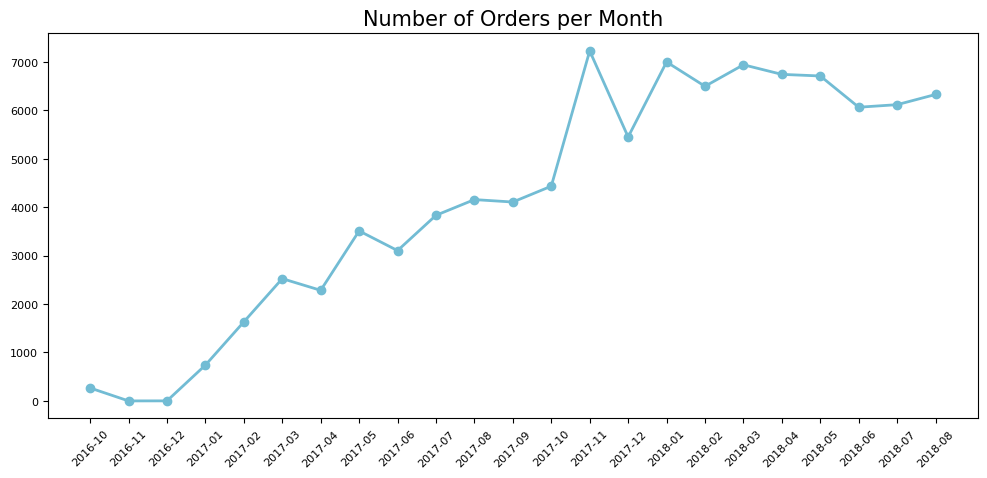

In [209]:
plt.figure(figsize=(12, 5))
plt.plot(monthly_orders_df["order_purchase_timestamp"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Number of Orders per Month", loc="center", fontsize=15)
plt.xticks(rotation=45,fontsize=8)
plt.yticks(fontsize=8)
plt.show()

Order terbanyak terjadi di bulan November 2017, sedangkan penurunan order yang signifikan terjadi di bulan Desember 2017, Februari 2018, dan Juni 2018. Hal ini tentu berdampak pada total revenue perusahaan di bulan-bulan tersebut. Maka perlu validasi untuk melihat apakah benar terjadi penurunan revenue.

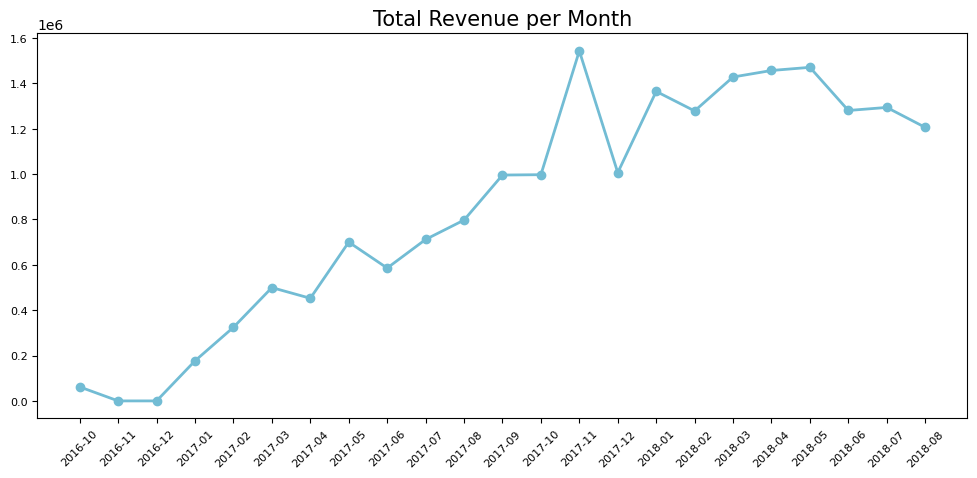

In [210]:
plt.figure(figsize=(12, 5))
plt.plot(
    monthly_orders_df["order_purchase_timestamp"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month", loc="center", fontsize=15)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.show()

### Pertanyaan 2 : Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?

In [211]:
# Membuat dataframe jumlah order per item produk berdasarkan categori produk:

sum_order_items_df = df.groupby("product_category_name_english").order_item_id.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.rename(columns={"product_category_name_english":"product_category", "order_item_id":"quantity"}, inplace=True)
sum_order_items_df.head(15)

,product_category,quantity
0,bed_bath_table,16346.0
1,furniture_decor,11783.0
2,health_beauty,11146.0
3,sports_leisure,10041.0
4,computers_accessories,10002.0
5,housewares,9265.0
6,watches_gifts,6631.0
7,garden_tools,5977.0
8,telephony,5173.0
9,auto,4714.0


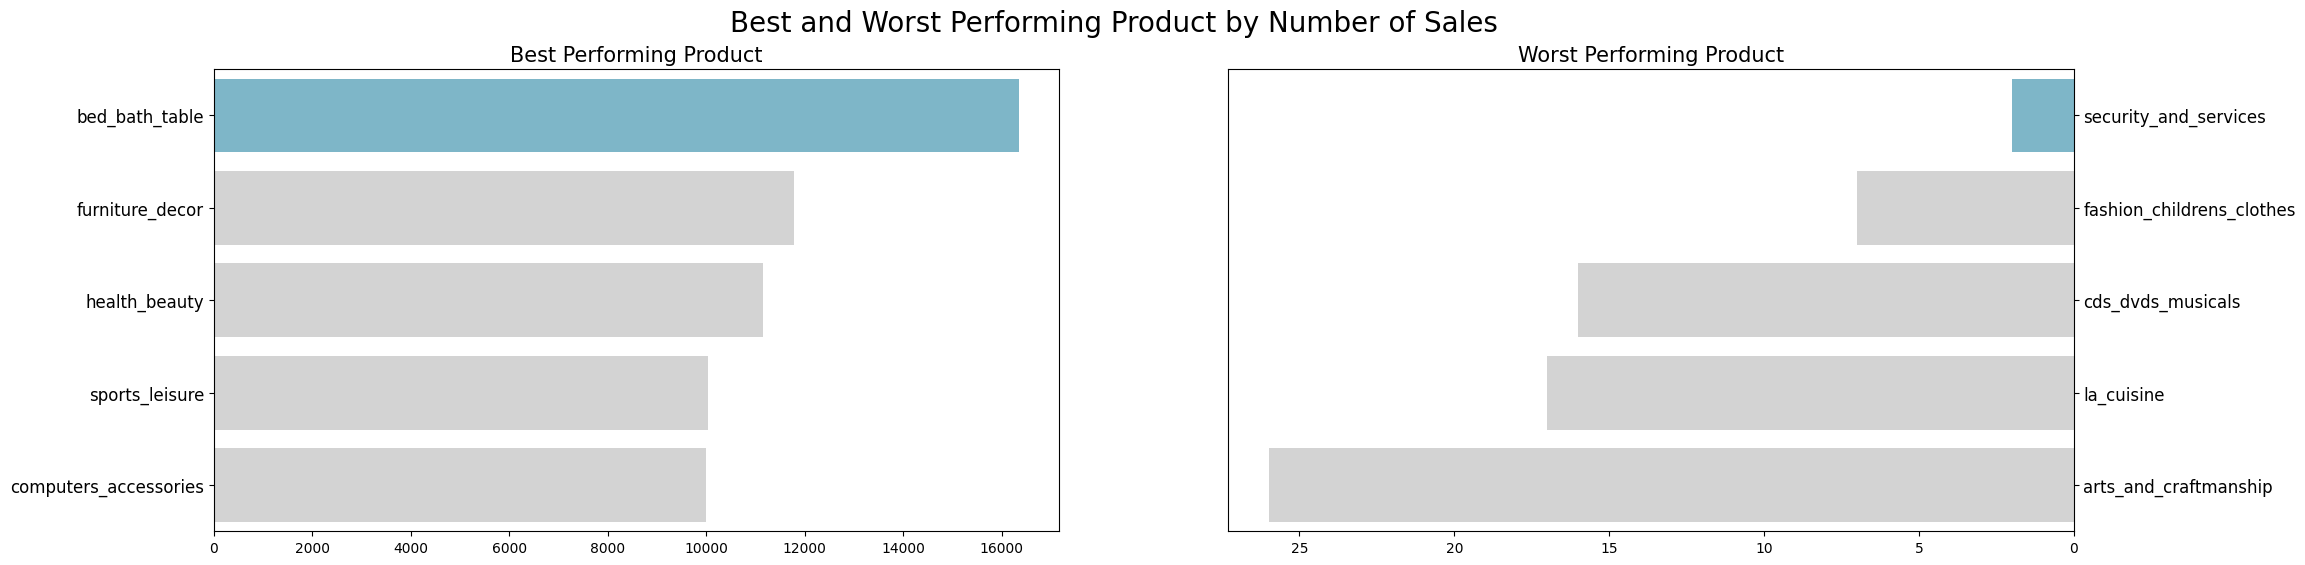

In [212]:
# Membuat visualisasi untuk kategori "Best & Worst Performing Product by Number of Sales"

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="quantity", y="product_category", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="quantity", y="product_category", data=sum_order_items_df.sort_values(by="quantity", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

### Pertanyaan 3, 4, 5
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
- Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?

Untuk menjawab ketiga pertanyaan ini akan dilakukan RFM analysis, dimana RFM analysis merupakan salah satu metode yang umum digunakan untuk melakukan segmentasi pelanggan (mengelompokkan pelanggan ke dalam beberapa kategori) berdasarkan tiga parameter, yaitu recency, frequency, dan monetary.

- Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
- Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
- Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

Berdasarkan tiga parameter tersebut, kita bisa mengidentifikasi pelanggan mana yang memiliki high value (sering melakukan transaksi dan menghasilkan revenue yang besar) dan low value.

In [217]:
# Membuat dataframe baru untuk menampung informasi terkait 3 parameter tersebut :

rfm_df = df.groupby(by='customer_id', as_index=False).agg({
    'order_purchase_timestamp': 'max', # mengambil tanggal order terakhir
    'order_id': 'nunique', # menghitung jumlah order
    'payment_value': 'sum' # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ['customer_id', 'max_order_timestamp', 'frequency', 'monetary']

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df['max_order_timestamp'] = rfm_df['max_order_timestamp'].dt.date
recent_date = df['order_purchase_timestamp'].dt.date.max()
rfm_df['recency'] = rfm_df['max_order_timestamp'].apply(lambda x: (recent_date - x).days)

rfm_df.drop('max_order_timestamp', axis=1, inplace=True)
rfm_df

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,288
1,000161a058600d5901f007fab4c27140,1,67.41,409
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,547
3,0002414f95344307404f0ace7a26f1d5,1,179.35,378
4,000379cdec625522490c315e70c7a9fb,1,107.01,149
...,...,...,...,...
95596,fffcb937e9dd47a13f05ecb8290f4d3e,1,91.91,165
95597,fffecc9f79fd8c764f843e9951b11341,1,81.36,153
95598,fffeda5b6d849fbd39689bb92087f431,1,63.13,99
95599,ffff42319e9b2d713724ae527742af25,1,214.13,77


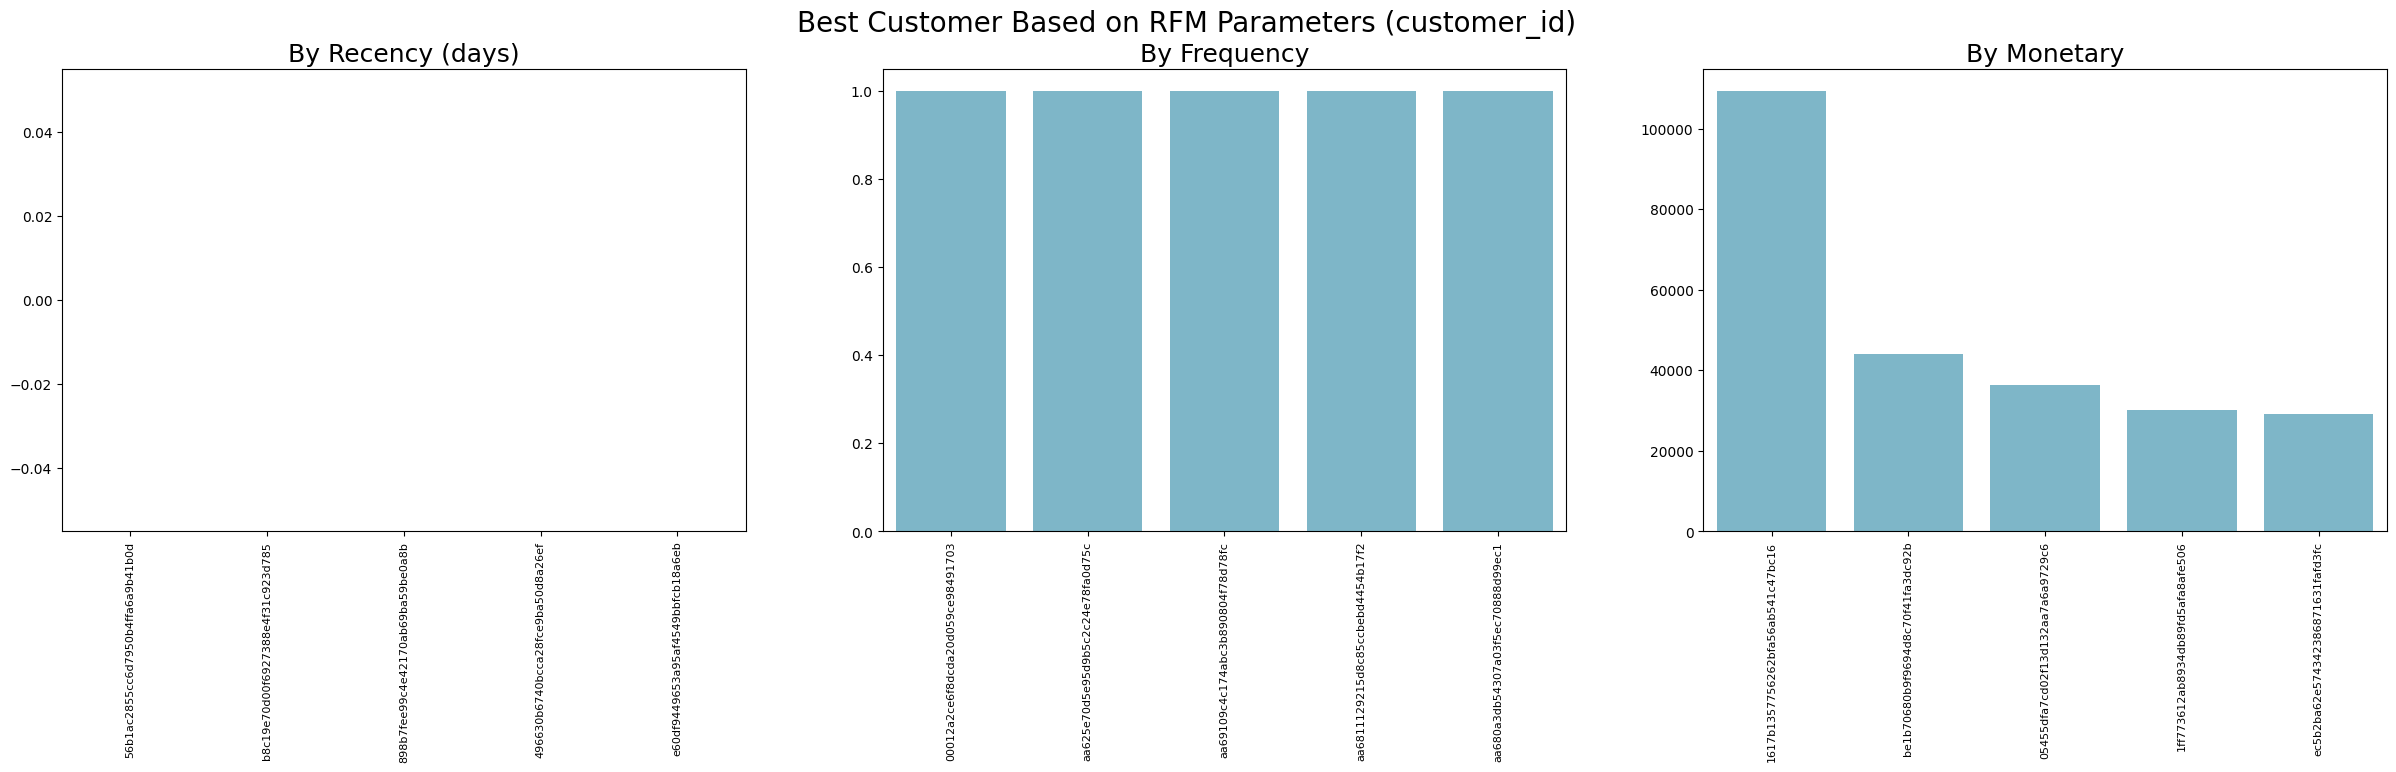

In [233]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', rotation=90, labelsize=8)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', rotation=90, labelsize=8)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', rotation=90, labelsize=8)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

## Conclusion

- Conclution pertanyaan 1 : Penurunan jumlah orderan yang sangat signifikan terjadi pada bulan November 2017, Februari 2018, dan Juni 2018 berdampak terhadap penurunan revenue perusahaan.
- Conclution pertanyaan 2 : Kategori produk dengan jumlah penjualan terbanyak adalah produk bed_bath_table, sedangkan yang paling sedikit adalah produk security_and_services.
- Conclusion pertanyaan 3 :

In [224]:
recent_date = df['order_purchase_timestamp'].dt.date.max()
tanggal_terakhir = recent_date.strftime("%d %B %Y")
print ("Tanggal terakhir pelanggan melakukan transaksi adalah ", tanggal_terakhir)

Tanggal terakhir pelanggan melakukan transaksi adalah  29 August 2018


- Conclution pertanyaan 4 : Seorang pelanggan melakukan 1x pembelian dalam beberapa bulan terakhir.
- Conclusion pertanyaan 5 :

In [232]:
avg_spending = data['monetary'].mean()
print('Rata-rata banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir adalah :',avg_spending)

Rata-rata banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir adalah : 49827.08


In [234]:
df.to_csv("all_data.csv", index=False)

#### Dashboard by Streamlit

In [287]:
# install Streamlit dan pyngrok
!pip install streamlit

In [356]:
%%writefile dashboard.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

sns.set(style='dark')

def main():
  st.title("Proyek Analisis Data Dicoding")
  st.text("Studi Kasus Brazilian E-Commerce")

  menu = ["Home","About"]
  choice = st.sidebar.selectbox('Menu',menu)
  if choice == 'Home':
    st.subheader("Dashboard")

if __name__ == "__main__":
  main()


# Membuat beberapa helper function :
## Membuat daily_order_df :

def create_daily_orders_df(df):
    daily_orders_df = df.resample(rule='D', on='order_purchase_timestamp').agg({
        "order_id": "nunique",
        "payment_value": "sum"
    })
    daily_orders_df = daily_orders_df.reset_index()
    daily_orders_df.rename(columns={
        "order_id": "order_count",
        "payment_value": "revenue"
    }, inplace=True)

    return daily_orders_df

## Membuat sum_order_items_df :

def create_sum_order_items_df(df):
    sum_order_items_df = df.groupby("product_category_name_english").order_item_id.sum().sort_values(ascending=False).reset_index()
    return sum_order_items_df

## Membuat rfm_df :

def create_rfm_df(df):
    rfm_df = df.groupby(by="customer_id", as_index=False).agg({
        "order_purchase_timestamp": "max", #mengambil tanggal order terakhir
        "order_id": "nunique",
        "payment_value": "sum"
    })
    rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

    rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
    recent_date = df["order_purchase_timestamp"].dt.date.max()
    rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
    rfm_df.drop("max_order_timestamp", axis=1, inplace=True)

    return rfm_df

# Memanggil cleaned data
all_df = pd.read_csv("all_data.csv")


datetime_columns = ["order_purchase_timestamp", "order_delivered_customer_date"]
all_df.sort_values(by="order_purchase_timestamp", inplace=True)
all_df.reset_index(inplace=True)

for column in datetime_columns:
    all_df[column] = pd.to_datetime(all_df[column])


# Membuat filter data

min_date = all_df["order_purchase_timestamp"].min()
max_date = all_df["order_purchase_timestamp"].max()

with st.sidebar:
    # Mengambil start_date & end_date dari date_input
    start_date, end_date = st.date_input(
        label='Rentang Waktu',min_value=min_date,
        max_value=max_date,
        value=[min_date, max_date]
    )

main_df = all_df[(all_df["order_purchase_timestamp"] >= str(start_date)) &
                (all_df["order_purchase_timestamp"] <= str(end_date))]


# Menyiapkan dataframe
daily_orders_df = create_daily_orders_df(main_df)
sum_order_items_df = create_sum_order_items_df(main_df)
rfm_df = create_rfm_df(main_df)


tab1, tab2, tab3 = st.tabs(["Daily Orders", "Best & Worst Performing Products", "Best Customer Based on RFM Parameters"])

with tab1: # daily order
    st.header("Daily Orders")
    col1, col2 = st.columns(2)

    with col1:
      total_orders = daily_orders_df.order_count.sum()
      st.metric("Total orders", value=total_orders)

    with col2:
      total_revenue = daily_orders_df.revenue.sum()
      st.metric("Total Revenue", value=total_revenue)

    fig, ax = plt.subplots(figsize=(16, 8))
    ax.plot(
      daily_orders_df["order_purchase_timestamp"],
      daily_orders_df["order_count"],
      marker='o',
      linewidth=2,
      color="#90CAF9"
    )
    ax.tick_params(axis='y', labelsize=20)
    ax.tick_params(axis='x', labelsize=15)

    st.pyplot(fig)

with tab2: # performansi produk
    st.header("Best & Worst Performing Products")
    sum_order_items_df = all_df.groupby("product_category_name_english").order_item_id.sum().sort_values(ascending=False).reset_index()
    sum_order_items_df.rename(columns={"product_category_name_english":"product_category", "order_item_id":"quantity"}, inplace=True)

    st.subheader("Best & Worst Performing Product")

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))

    colors = ["#90CAF9", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

    sns.barplot(x="quantity", y="product_category", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
    ax[0].set_ylabel(None)
    ax[0].set_xlabel("Number of Sales", fontsize=30)
    ax[0].set_title("Best Performing Product", loc="center", fontsize=50)
    ax[0].tick_params(axis='y', labelsize=35)
    ax[0].tick_params(axis='x', labelsize=30)

    sns.barplot(x="quantity", y="product_category", data=sum_order_items_df.sort_values(by="quantity", ascending=True).head(5), palette=colors, ax=ax[1])
    ax[1].set_ylabel(None)
    ax[1].set_xlabel("Number of Sales", fontsize=30)
    ax[1].invert_xaxis()
    ax[1].yaxis.set_label_position("right")
    ax[1].yaxis.tick_right()
    ax[1].set_title("Worst Performing Product", loc="center", fontsize=50)
    ax[1].tick_params(axis='y', labelsize=35)
    ax[1].tick_params(axis='x', labelsize=30)

    st.pyplot(fig)

with tab3: # RFM analysis
    st.header("Best Customer Based on RFM Parameters")
    col1, col2, col3 = st.columns(3)

    with col1:
      avg_recency = round(rfm_df.recency.mean(), 1)
      st.metric("Average Recency (days)", value=avg_recency)

    with col2:
      avg_frequency = round(rfm_df.frequency.mean(), 2)
      st.metric("Average Frequency", value=avg_frequency)

    with col3:
      avg_frequency = rfm_df.monetary.mean()
      st.metric("Average Monetary", value=avg_frequency)

    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(35, 15))
    colors = ["#90CAF9", "#90CAF9", "#90CAF9", "#90CAF9", "#90CAF9"]

    sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
    ax[0].set_ylabel(None)
    ax[0].set_xlabel("customer_id", fontsize=30)
    ax[0].set_title("By Recency (days)", loc="center", fontsize=50)
    ax[0].tick_params(axis='y', labelsize=30)
    ax[0].tick_params(axis='x', rotation=90, labelsize=35)

    sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
    ax[1].set_ylabel(None)
    ax[1].set_xlabel("customer_id", fontsize=30)
    ax[1].set_title("By Frequency", loc="center", fontsize=50)
    ax[1].tick_params(axis='y',  labelsize=30)
    ax[1].tick_params(axis='x', rotation=90, labelsize=35)

    sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
    ax[2].set_ylabel(None)
    ax[2].set_xlabel("customer_id", fontsize=30)
    ax[2].set_title("By Monetary", loc="center", fontsize=50)
    ax[2].tick_params(axis='y', labelsize=30)
    ax[2].tick_params(axis='x', rotation=90, labelsize=35)

    st.pyplot(fig)

st.caption('Copyright © JaneTamara 2023')

Overwriting dashboard.py


In [ ]:
!streamlit run dashboard.py & npx localtunnel --port 8501

[..................] / rollbackFailedOptional: verb npm-session 26330bbf318ee6e


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.192.58.200:8501

npx: installed 22 in 2.185s
your url is: https://fair-points-trade.loca.lt
